In [12]:
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np
import time
import random
import seaborn as sns

# Define User-Agent headers
user_agents = [
    'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36',
    'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36',
    'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.0.0 Safari/537.36',
    'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.0.0 Safari/537.36',
    'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.0.0 Safari/537.36',
    'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/16.1 Safari/605.1.15',
    'Mozilla/5.0 (Macintosh; Intel Mac OS X 13_1) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/16.1 Safari/605.1.15'
]


In [8]:
# Set up headers for requests
def get_headers():
    return {'User-Agent': random.choice(user_agents)}

# Scraping function
def scrape_hacker_news(pages=10):
    articles = []
    current_page = 1

    while current_page <= pages:
        try:
            # Fetch the content of the current page
            url = f"https://news.ycombinator.com/news?p={current_page}"
            response = requests.get(url, headers=get_headers(), timeout=10)

            if response.status_code != 200:
                print(f"Failed to retrieve page {current_page}. HTTP Status Code: {response.status_code}")
                break

            soup = BeautifulSoup(response.content, 'html.parser')

            # Extract article metadata
            articles_rows = soup.select('tr.athing')  # Rows containing articles

            for row in articles_rows:
                try:
                    # Extract rank
                    rank_raw = row.select_one('span.rank').text.strip()
                    rank = rank_raw.rstrip('.') + 'th'  # Convert "1." to "1st" etc.
                    if rank.startswith('1'): rank = rank_raw.rstrip('.') + 'st'  # Handle "1st"
                    if rank.startswith('2'): rank = rank_raw.rstrip('.') + 'nd'  # Handle "2nd"
                    if rank.startswith('3'): rank = rank_raw.rstrip('.') + 'rd'  # Handle "3rd"

                    # Extract title and URL
                    title_tag = row.select_one('span.titleline > a')
                    title = title_tag.text.strip()
                    url = title_tag['href'].strip()

                    # Extract points
                    next_row = row.find_next_sibling('tr')  # Points are in the next row
                    score_tag = next_row.select_one('span.score')
                    points = int(score_tag.text.replace(' points', '').strip()) if score_tag else 0

                    articles.append({
                        'rank': rank,
                        'title': title,
                        'url': url,
                        'points': points
                    })
                except Exception as e:
                    print(f"Error extracting article data: {e}")

            print(f"Successfully scraped page {current_page}")
            current_page += 1
            time.sleep(random.uniform(1, 3))  # Avoid being blocked by adding random delays

        except requests.exceptions.RequestException as e:
            print(f"Network issue on page {current_page}: {e}")
            time.sleep(5)  # Retry delay

    return articles

In [9]:
# Run the scraper
articles = scrape_hacker_news(pages=10)

# Display the results
print(f"Scraped {len(articles)} articles.")
for article in articles[:5]:  # Display the first 5 articles as a sample
    print(article)

Successfully scraped page 1
Successfully scraped page 2
Successfully scraped page 3
Successfully scraped page 4
Successfully scraped page 5
Successfully scraped page 6
Successfully scraped page 7
Successfully scraped page 8
Successfully scraped page 9
Successfully scraped page 10
Scraped 300 articles.
{'rank': '1st', 'title': 'Insects rely on sounds made by distressed vegetation to guide reproduction', 'url': 'https://www.nytimes.com/2024/12/06/science/moths-hearing-plant-sounds.html', 'points': 98}
{'rank': '2nd', 'title': 'Researchers Use AI to Turn Sound Recordings into Accurate Street Images', 'url': 'https://news.utexas.edu/2024/11/27/researchers-use-ai-to-turn-sound-recordings-into-accurate-street-images/', 'points': 59}
{'rank': '3rd', 'title': 'Qutebrowser: A keyboard-driven, Vim-like browser', 'url': 'https://github.com/qutebrowser/qutebrowser', 'points': 44}
{'rank': '4th', 'title': 'The Need to Grind Concrete Examples Before Jumping Up a Level of Abstraction', 'url': 'https:

In [10]:
# The variable `articles` contains the scraped data from Task 2
def store_data_in_dataframe(articles):
    # Create a DataFrame
    df = pd.DataFrame(articles, columns=['rank', 'title', 'url', 'points'])

    # Save the DataFrame to a CSV file
    file_name = "Assignment3_TaiCongChiNguyen.csv"
    df.to_csv(file_name, index=False)
    print(f"Data saved successfully to {file_name}")

# Store data in a DataFrame and save to CSV
store_data_in_dataframe(articles)

Data saved successfully to Assignment3_TaiCongChiNguyen.csv


In [11]:
def sort_articles_by_points(articles):
    # Convert the articles list to a DataFrame
    df = pd.DataFrame(articles, columns=['rank', 'title', 'url', 'points'])

    # Sort the DataFrame by the 'points' column in ascending order
    sorted_df = df.sort_values(by='points', ascending=True)
    return sorted_df

# Sort the articles without saving or loading from a file
sorted_articles_df = sort_articles_by_points(articles)

# Display the sorted DataFrame
print("Articles sorted by points in ascending order:")
print(sorted_articles_df)


Articles sorted by points in ascending order:
      rank                                              title  \
31    32rd                           GroMo (YC W21) Is Hiring   
283  284nd  Deciphering C++ compiler errors: Nonsensical e...   
189  190st  A lorry-load of antimatter will help solve sec...   
198  199st  Everyone Is Capable of Mathematical Thinking–Y...   
258  259nd  Refactoring in C++: Top Techniques and Best Pr...   
..     ...                                                ...   
61    62th  My son (9 yrs old) used plain JavaScript to ma...   
108  109st      Genie 2: A large-scale foundation world model   
49    50th                                      Every V4 UUID   
200  201nd                                Advent of Code 2024   
104  105st                                           IMG_0001   

                                                   url  points  
31   https://www.ycombinator.com/companies/gromo/jo...       0  
283  https://devblogs.microsoft.com/oldnewt

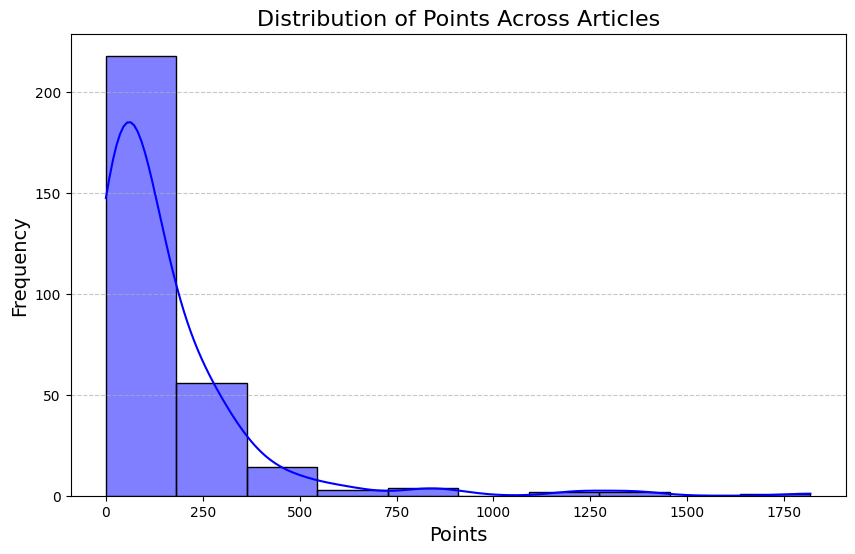

<ipython-input-13-6ab3d9dfc3c4>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='points', y='title', data=top_10, palette='viridis')


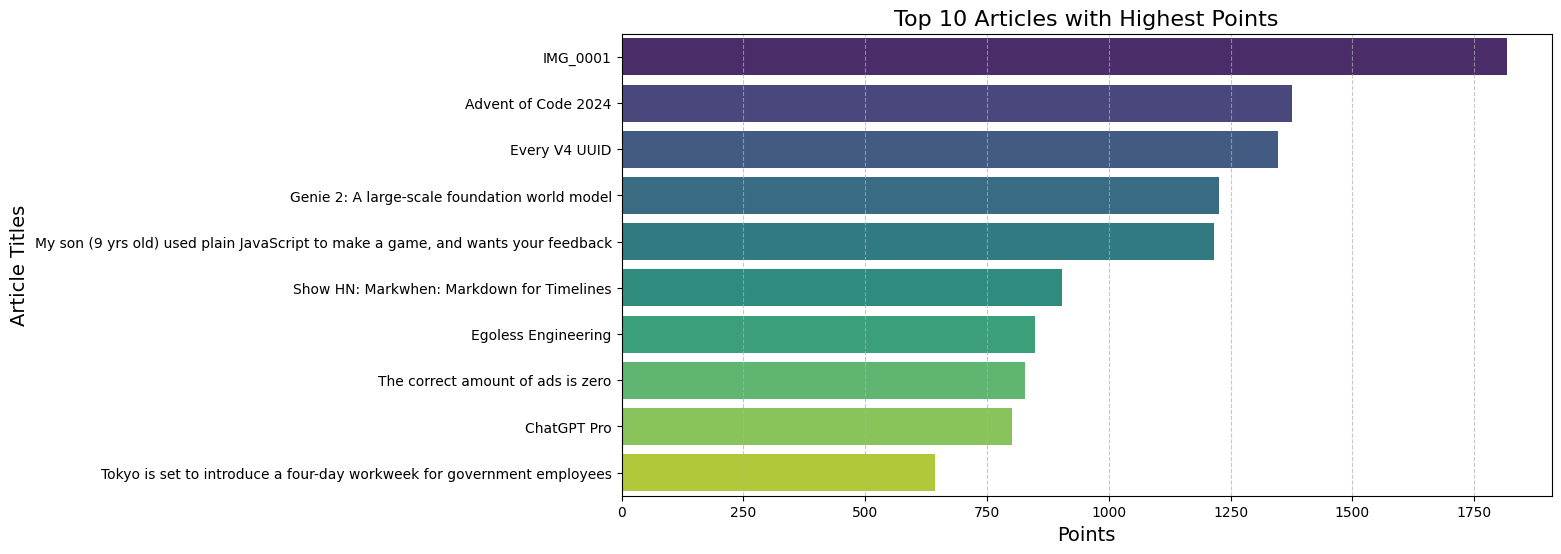

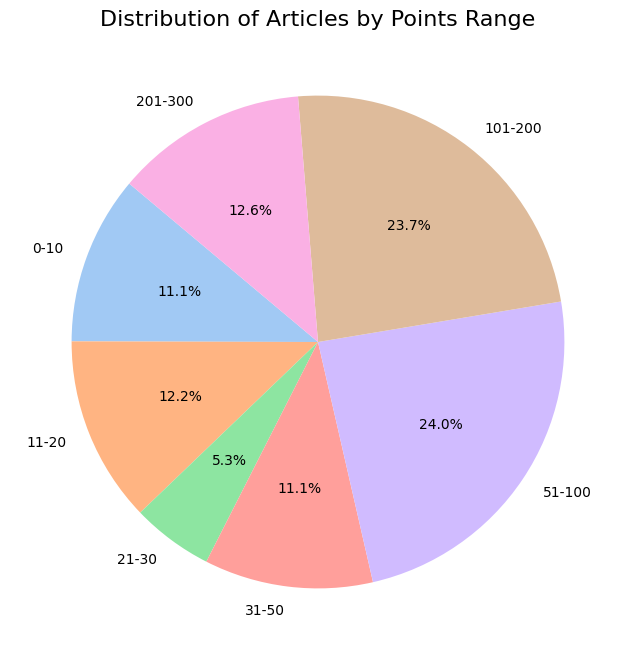

In [13]:
def visualize_data(df):
    # Histogram: Distribution of Points
    plt.figure(figsize=(10, 6))
    sns.histplot(df['points'], bins=10, kde=True, color='blue', edgecolor='black')
    plt.title('Distribution of Points Across Articles', fontsize=16)
    plt.xlabel('Points', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

    # Bar Plot: Top 10 Articles with Highest Points
    top_10 = df.nlargest(10, 'points')
    plt.figure(figsize=(12, 6))
    sns.barplot(x='points', y='title', data=top_10, palette='viridis')
    plt.title('Top 10 Articles with Highest Points', fontsize=16)
    plt.xlabel('Points', fontsize=14)
    plt.ylabel('Article Titles', fontsize=14)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()

    # Pie Chart: Distribution of Articles in Different Points Ranges
    bins = [0, 10, 20, 30, 50, 100, 200, 300]
    labels = ['0-10', '11-20', '21-30', '31-50', '51-100', '101-200', '201-300']
    df['points_range'] = pd.cut(df['points'], bins=bins, labels=labels, right=False)
    range_counts = df['points_range'].value_counts().sort_index()
    plt.figure(figsize=(8, 8))
    plt.pie(range_counts, labels=range_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
    plt.title('Distribution of Articles by Points Range', fontsize=16)
    plt.show()

df = pd.DataFrame(articles)

# Visualize the data
visualize_data(df)
